In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import os
from wordcloud import WordCloud


In [110]:
import pandas as pd


df_receta = pd.read_csv('./receta.csv')
df_categorias = pd.read_csv('./categorias.csv')

C:\Users\rafas\AppData\Local\Temp\ipykernel_22044\75647350.py:1: DtypeWarning: Columns (23,103) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total = pd.read_csv('./receta_info.csv')


In [121]:
df_total["user.instagram"].value_counts().head(15)

user.instagram
No disponible           1866
mycook_taurus            478
rinconbelenrepostera     117
yukikomaid                68
no tengo                  61
@resturaant               50
@conlaszarpas             46
@amparoenlacocina         43
@monicolomari             38
antoniotorresfdz          37
@olgacastillomacia        36
DosRombosEnLaCocina       35
by_marilo                 31
@cookinandotm             31
@cocinandoconmycook       31
Name: count, dtype: int64

In [122]:
df_total["advice"].fillna("No disponible", inplace=True)
df_total["user.webName"].fillna("No disponible", inplace=True)
df_total["user.instagram"].fillna("No disponible", inplace=True)
df_total["user.twitter"].fillna("No disponible", inplace=True)
df_total["user.web"].fillna("No disponible", inplace=True)
df_total["imageRights"].fillna("No disponible", inplace=True)
df_total["rate"].fillna("No disponible", inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_22044\2948736481.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_total["advice"].fillna("No disponible", inplace=True)
C:\Users\rafas\AppData\Local\Temp\ipykernel_22044\2948736481.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


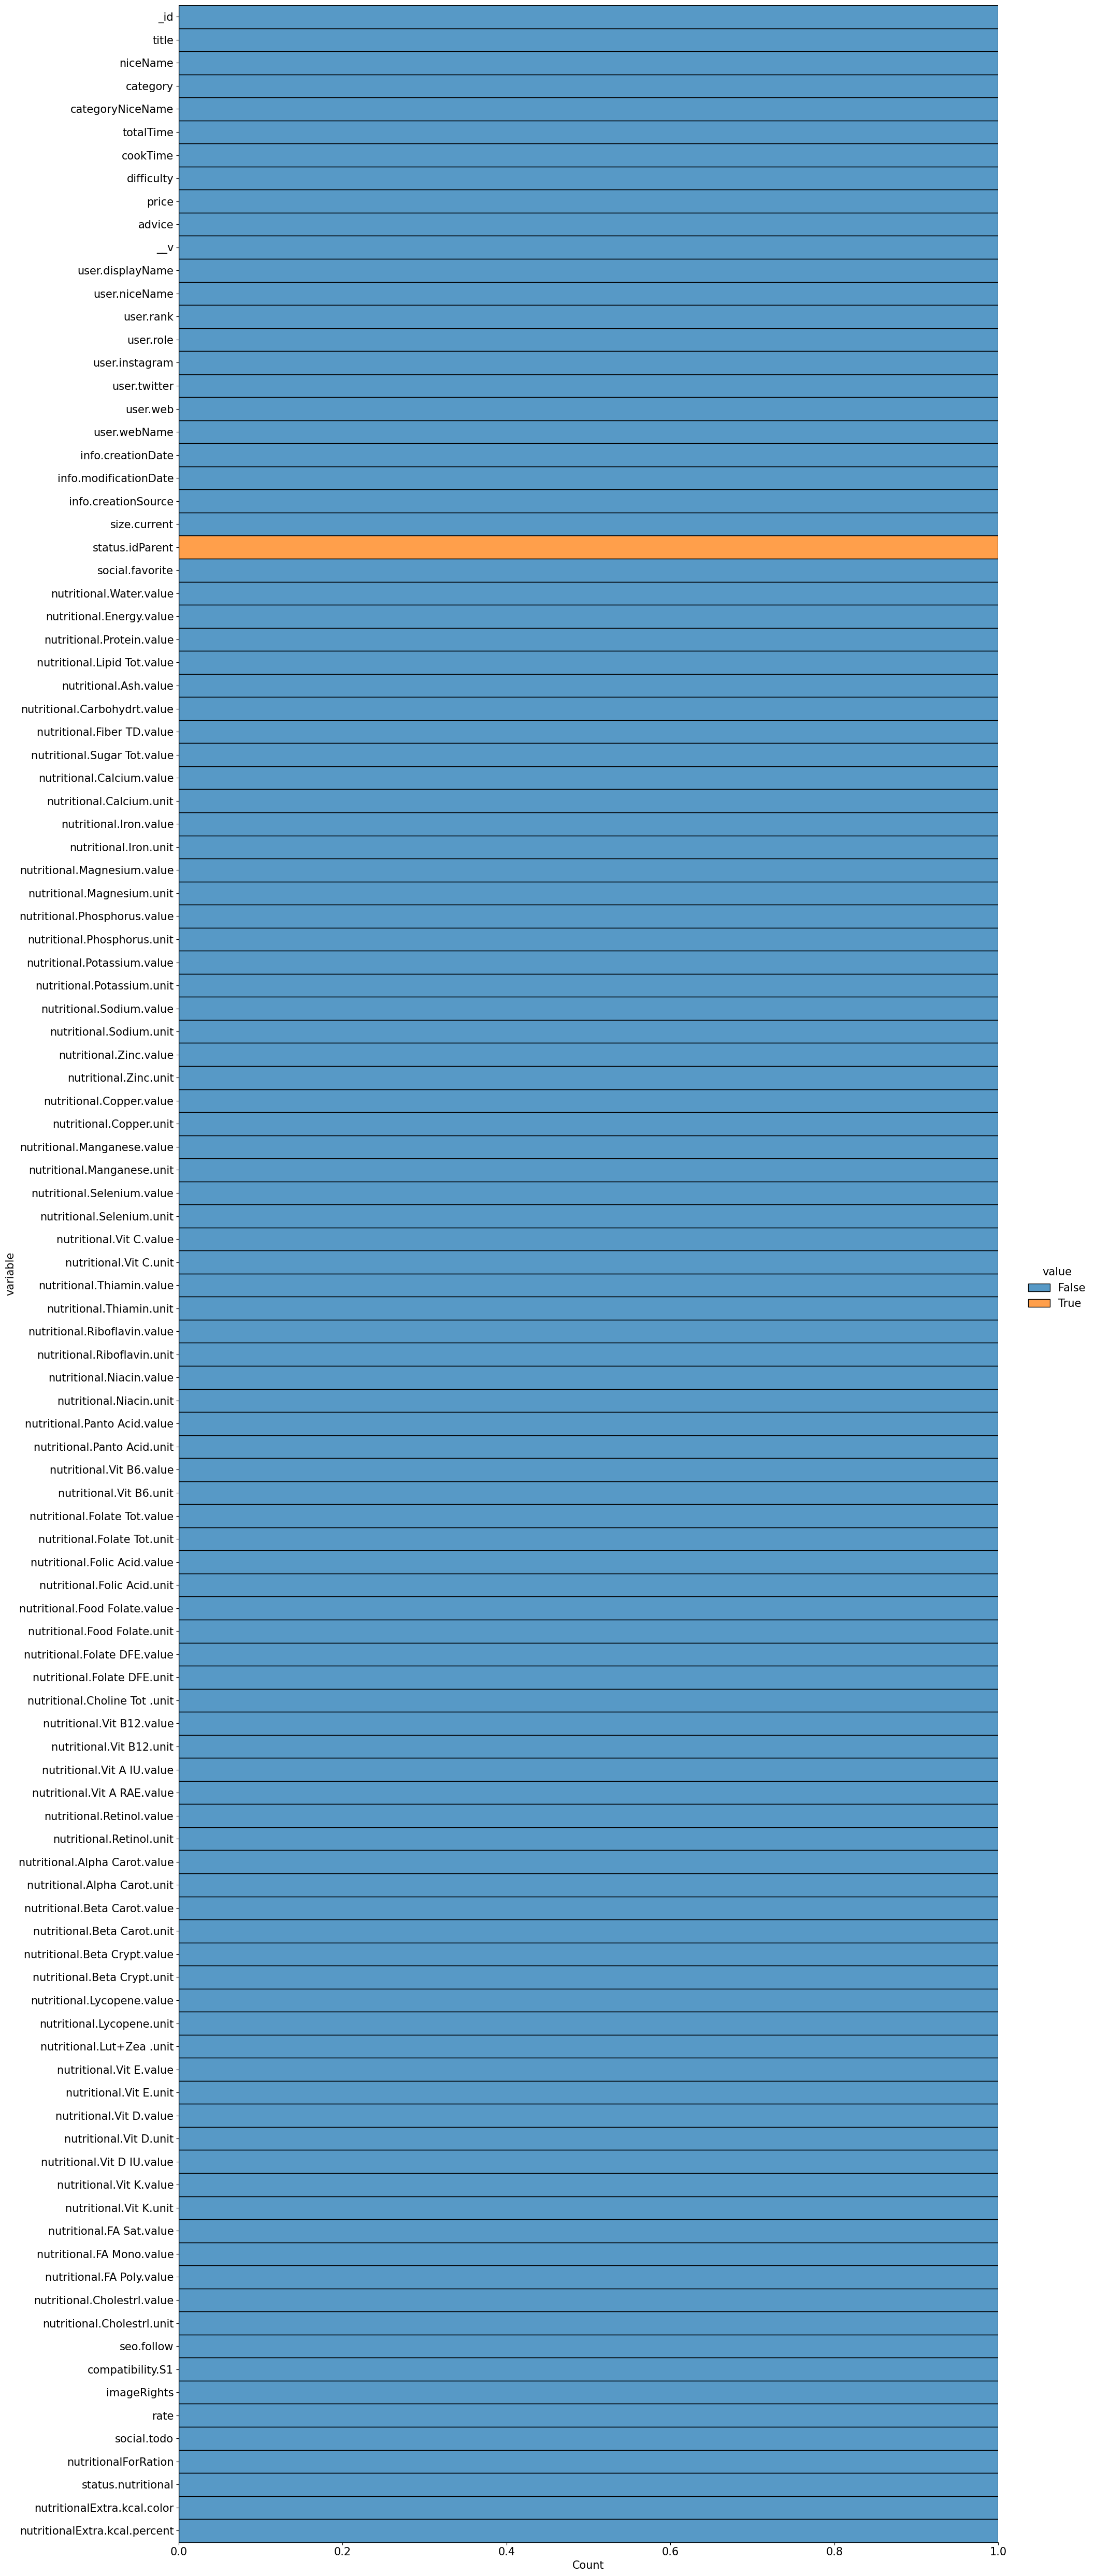

In [123]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})  # Aumenta el tamaño de la fuente

df_total.isnull().melt().pipe(lambda df: (
    sns.displot(
        data=df,
        y='variable',
        hue='value',
        multiple='fill',
        aspect=0.4,
        height=50
    )
))

In [124]:
del(df_total["status.idParent"])

In [85]:
df_receta["tags"].fillna("No disponible", inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_22044\2763555506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_receta["tags"].fillna("No disponible", inplace=True)


##  Visualizamos las categorias y numero de recetas por categoría

In [86]:
df_categorias

,name,niceName,count,checkedCount
0,Aperitivos y tapas,aperitivos-tapas,1180,132
1,Arroces,arroces,859,58
2,Bebidas y cócteles,bebidas-y-cocktails,620,91
3,Carnes y aves,carnes-y-aves,1453,179
4,"Cremas, caldos y sopas",cremas-caldos-sopas,1824,171
5,Dulces y repostería,dulces-y-reposteria,5204,429
6,Ensaladas,ensaladas,174,63
7,Huevos y tarrinas,huevos-y-tarrinas,1255,400
8,Masas,masas,1087,107
9,Papillas y alimentación infantil,alimentacion-infantil,232,23


## Aqui visualizamos las recetas con su particularidades, tiempo de cocinado, dificultad, precio, pasos de cocinado, etiquetas

In [87]:
df_receta.head(5)

,title,niceName,category,totalTime,difficulty,price,ingredients,steps,tags,group_steps,course
0,Salsa mozárabe de Belén,salsa-mozarabe-de-belen,Salsas y guarniciones,18.00,2,2,"Aceite Oliva (35 ml), Cebolla (150 gr), Pasas ...",6,No disponible,"Calentar el aceite, Añadir Cebolla, pasas y or...",entrante
1,Lentejas con arroz al aroma de Jerez (TM5 v2),lentejas-con-arroz-al-aroma-de-jerez--tm5-v2,Potajes y legumbres,0.05,1,1,"Zanahoria (120 gr), Puerro (100 gr), Ajo (2 cl...",6,No disponible,¡ATENCIÓN! LA PLATAFORMA ME OBLIGA A PUBLICAR ...,primer plato
2,Lentejas con arroz al aroma de Jerez (TM5),lentejas-con-arroz-al-aroma-de-jerez,Potajes y legumbres,0.05,1,1,"Zanahoria (120 gr), Puerro (100 gr), Ajo (2 cl...",5,No disponible,¡ATENCIÓN! LA PLATAFORMA ME OBLIGA A PUBLICAR ...,primer plato
3,Arroz Rojo Integral con Gambas y Calamar al Aj...,arroz-rojo-integral-con-gambas-y-calamar-al-aj...,Arroces,43.50,1,1,"Ajo (3 clv), Aceite Oliva (60 gr), Guindilla (...",6,Gastronomía/Asiática,Mete los ajos en la jarra junto con el aceite ...,segundo plato
4,Galletas sin azúcar (Snacks),galletas-sin-azucar--snacks,Dulces y repostería,3.00,1,1,"Plátano (2 u), Avena en copos (80 gr), Cacao (...",2,"Dietas/Baja en calorías, Gastronomía/Mediterránea","Añadimos todos los ingredientes a la jarra, Qu...",postre


In [88]:
df_receta["difficulty"].value_counts()

difficulty
1    8263
0     891
2     769
3      29
Name: count, dtype: int64

In [89]:
df_receta["steps"].value_counts()

steps
4     1552
5     1531
3     1514
2     1263
6     1237
1     1020
7      839
8      456
9      274
10     144
11      44
12      35
13      20
14       9
15       6
16       4
18       1
19       1
17       1
32       1
Name: count, dtype: int64

In [90]:
df_total.columns.to_list()

['_id',
 'title',
 'niceName',
 'category',
 'categoryNiceName',
 'totalTime',
 'cookTime',
 'difficulty',
 'price',
 'advice',
 '__v',
 'user.displayName',
 'user.niceName',
 'user.rank',
 'user.role',
 'user.instagram',
 'user.twitter',
 'user.web',
 'user.webName',
 'info.creationDate',
 'info.modificationDate',
 'info.creationSource',
 'size.current',
 'status.idParent',
 'social.favorite',
 'nutritional.Water.value',
 'nutritional.Energy.value',
 'nutritional.Protein.value',
 'nutritional.Lipid Tot.value',
 'nutritional.Ash.value',
 'nutritional.Carbohydrt.value',
 'nutritional.Fiber TD.value',
 'nutritional.Sugar Tot.value',
 'nutritional.Calcium.value',
 'nutritional.Calcium.unit',
 'nutritional.Iron.value',
 'nutritional.Iron.unit',
 'nutritional.Magnesium.value',
 'nutritional.Magnesium.unit',
 'nutritional.Phosphorus.value',
 'nutritional.Phosphorus.unit',
 'nutritional.Potassium.value',
 'nutritional.Potassium.unit',
 'nutritional.Sodium.value',
 'nutritional.Sodium.unit',
 

In [91]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

def generar_graficas_automaticas(df, carpeta_salida='graficas', max_categorias=20):
    """
    Genera gráficas automáticamente para cada columna de un DataFrame y las guarda en una carpeta.

    Parámetros:
        df (pd.DataFrame): El DataFrame a analizar.
        carpeta_salida (str): Nombre de la carpeta donde se guardarán las gráficas.
        max_categorias (int): Máximo número de valores únicos para considerar una columna como categórica.
    """
    # Crear la carpeta de salida si no existe
    if not os.path.exists(carpeta_salida):
        os.makedirs(carpeta_salida)

    # Recorrer cada columna del DataFrame
    for columna in df.columns:
        print(f"Procesando columna: {columna}")
        
        try:
            # Determinar el tipo de dato de la columna
            if pd.api.types.is_numeric_dtype(df[columna]):
                # Gráficas para columnas numéricas
                plt.figure(figsize=(10, 6))
                sns.histplot(df[columna].dropna(), kde=True)
                plt.title(f'Distribución de {columna}')
                plt.savefig(os.path.join(carpeta_salida, f'{columna}_histograma.png'))
                plt.close()

                plt.figure(figsize=(10, 6))
                sns.boxplot(x=df[columna].dropna())
                plt.title(f'Boxplot de {columna}')
                plt.savefig(os.path.join(carpeta_salida, f'{columna}_boxplot.png'))
                plt.close()

            elif df[columna].nunique() <= max_categorias:
                # Gráficas para columnas categóricas o con pocos valores únicos
                plt.figure(figsize=(10, 6))
                sns.countplot(y=df[columna].dropna(), order=df[columna].value_counts().index)
                plt.title(f'Recuento de {columna}')
                plt.savefig(os.path.join(carpeta_salida, f'{columna}_countplot.png'))
                plt.close()

            elif pd.api.types.is_string_dtype(df[columna]):
                # Gráficas para columnas de texto
                text = ' '.join(df[columna].dropna().astype(str))
                if text.strip():  # Verificar que hay texto
                    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
                    plt.figure(figsize=(10, 5))
                    plt.imshow(wordcloud, interpolation='bilinear')
                    plt.axis('off')
                    plt.title(f'Nube de Palabras de {columna}')
                    plt.savefig(os.path.join(carpeta_salida, f'{columna}_wordcloud.png'))
                    plt.close()

            # Gráficas adicionales para columnas específicas (personalizable)
            if columna in ['totalTime', 'cookTime'] and pd.api.types.is_numeric_dtype(df[columna]):
                plt.figure(figsize=(10, 6))
                sns.lineplot(x=df.index, y=df[columna].dropna())
                plt.title(f'Línea de Tiempo de {columna}')
                plt.savefig(os.path.join(carpeta_salida, f'{columna}_lineplot.png'))
                plt.close()

            if 'nutritional' in columna and pd.api.types.is_numeric_dtype(df[columna]):
                plt.figure(figsize=(10, 6))
                sns.histplot(df[columna].dropna(), kde=True)
                plt.title(f'Distribución Nutricional de {columna}')
                plt.savefig(os.path.join(carpeta_salida, f'{columna}_nutricion_histograma.png'))
                plt.close()

        except Exception as e:
            print(f"Error al procesar la columna {columna}: {e}")

    print(f"Gráficas guardadas en la carpeta: {carpeta_salida}")

In [92]:
df_total.head(3)

,_id,title,niceName,category,categoryNiceName,totalTime,cookTime,difficulty,price,advice,...,nutritional.Cholestrl.unit,seo.follow,compatibility.S1,imageRights,rate,social.todo,nutritionalForRation,status.nutritional,nutritionalExtra.kcal.color,nutritionalExtra.kcal.percent
0,67aa4802c995db82d9be53da,Relleno para tarta de atún,relleno-para-tarta-de-atun,Pescados y mariscos,pescados-y-mariscos,630,630.0,1,2,No disponible,...,mg,True,relleno-para-tarta-de-atun,False,No disponible,1.0,False,Auto (Bad),Yellow,22.656050
1,679cdc1d0f62ba1b8efdc7fb,"Bizcocho de mandarina: ¡esponjoso, jugoso y de...",bizcocho-de-mandarina---esponjoso--jugoso-y-de...,Dulces y repostería,dulces-y-reposteria,6840,250.0,1,1,1.\tUtiliza mandarinas frescas. El sabor cítri...,...,mg,True,bizcocho-de-mandarina---esponjoso--jugoso-y-de...,True,No disponible,1.0,False,Auto (Good),Yellow,17.605821
2,6795e359087b7ea1a54c5aa2,Estofado de carne de cerdo low carb,estofado-de-carne-de-cerdo-low-carb,Carnes y aves,carnes-y-aves,60,60.0,1,1,No disponible,...,mg,True,estofado-de-carne-de-cerdo-low-carb,True,0.0,0.0,False,Auto (Bad),Yellow,19.292895


In [93]:
#generar_graficas_automaticas(df_total)

In [94]:
df_total["user.niceName"].value_counts()

user.niceName
admin              478
lourdes9444        266
mycook-chile       158
elrincondebelen    117
lauki              108
                  ... 
bng15                1
montseapsa           1
lolagal              1
manduiza             1
josubl               1
Name: count, Length: 2123, dtype: int64

In [95]:
df_total["user.web"].value_counts()

user.web
No disponible                                               1870
mycook.es                                                    478
https://www.youtube.com/channel/UCtChg7RtWM0f1crpuXJ-eOw     117
no tengo                                                      61
https://www.facebook.com/groups/776250376148378/              51
                                                            ... 
recetasschlichtcampos.es                                       1
https://yhoyquecomemos.com                                     1
http://afinandolasagujas.blogspot.com.es/?m=1                  1
https://www.instagram.com/matias_alejandroal/                  1
https://miacookcreaciones.blogspot.com/                        1
Name: count, Length: 96, dtype: int64

In [96]:
df_total["user.instagram"].value_counts()

user.instagram
No disponible           1866
mycook_taurus            478
rinconbelenrepostera     117
yukikomaid                68
no tengo                  61
                        ... 
@marymarcom                1
joaquinlc                  1
@matias_alejandroal        1
@rincon3103                1
oicorvier                  1
Name: count, Length: 303, dtype: int64

In [97]:
df_total[df_total['user.instagram']=="mycook_taurus"].groupby("categoryNiceName")["_id"].count()


categoryNiceName
alimentacion-infantil      9
aperitivos-tapas          37
arroces                   11
bebidas-y-cocktails       23
carnes-y-aves             65
cremas-caldos-sopas       53
dulces-y-reposteria      114
ensaladas                 14
huevos-y-tarrinas          9
masas                     15
pasta                     24
pescados-y-mariscos       21
potajes-legumbres         13
salsas-y-guarniciones     24
sorbetes-y-helados         4
verduras-y-hortalizas     42
Name: _id, dtype: int64

# INFO AUTOR

In [131]:
df_total.dropna(inplace=True)


Información del Autor:
user.displayName user.instagram
       danimar83  No disponible

Número de recetas por categoría para danimar83:
categoryNiceName
dulces-y-reposteria    3
aperitivos-tapas       1
bebidas-y-cocktails    1
carnes-y-aves          1
Name: _id, dtype: int64


C:\Users\rafas\AppData\Local\Temp\ipykernel_22044\2309502826.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


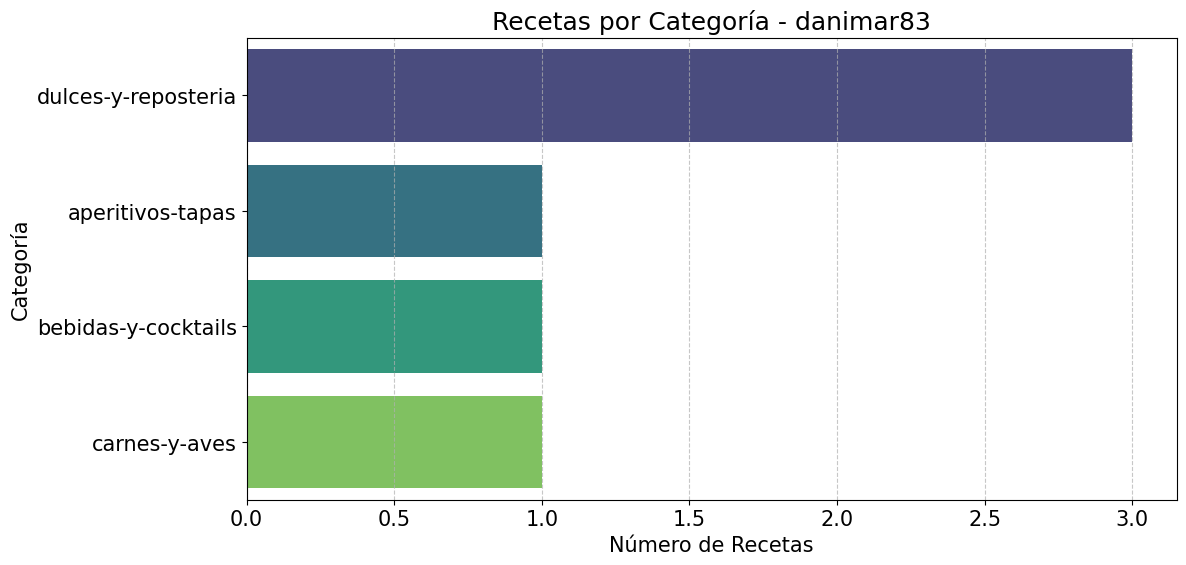


Evaluaciones de las recetas:
rate
No disponible    4
5.0              2
Name: count, dtype: int64


C:\Users\rafas\AppData\Local\Temp\ipykernel_22044\2309502826.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=evaluaciones.index, y=evaluaciones.values, palette='viridis')


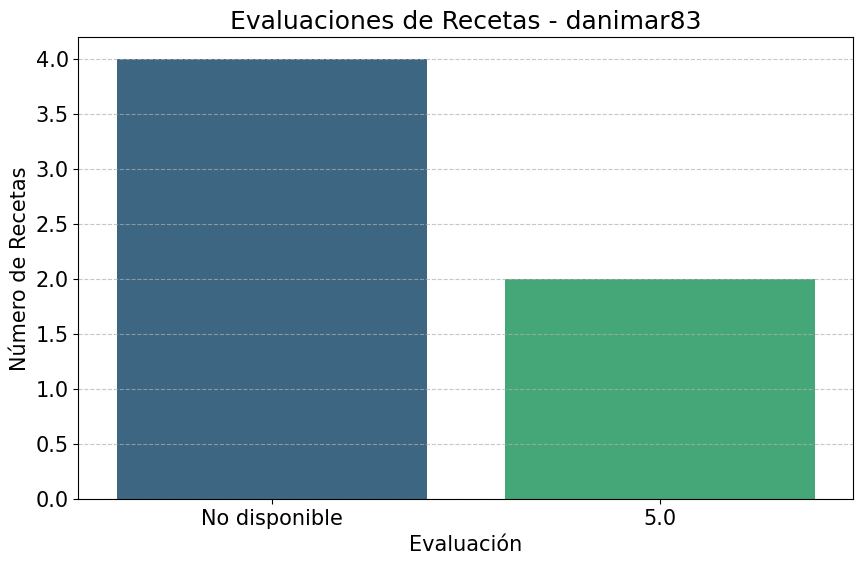

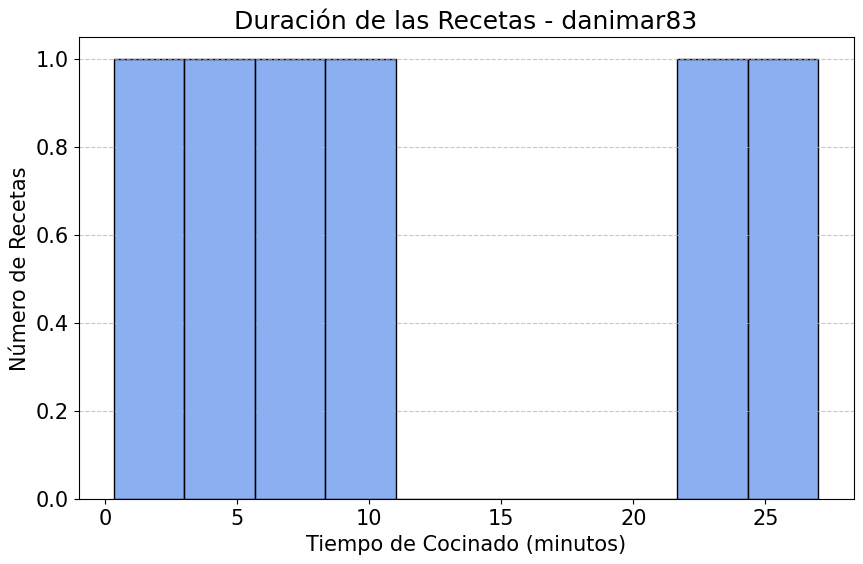

C:\Users\rafas\AppData\Local\Temp\ipykernel_22044\2309502826.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dificultad.index, y=dificultad.values, palette='viridis')


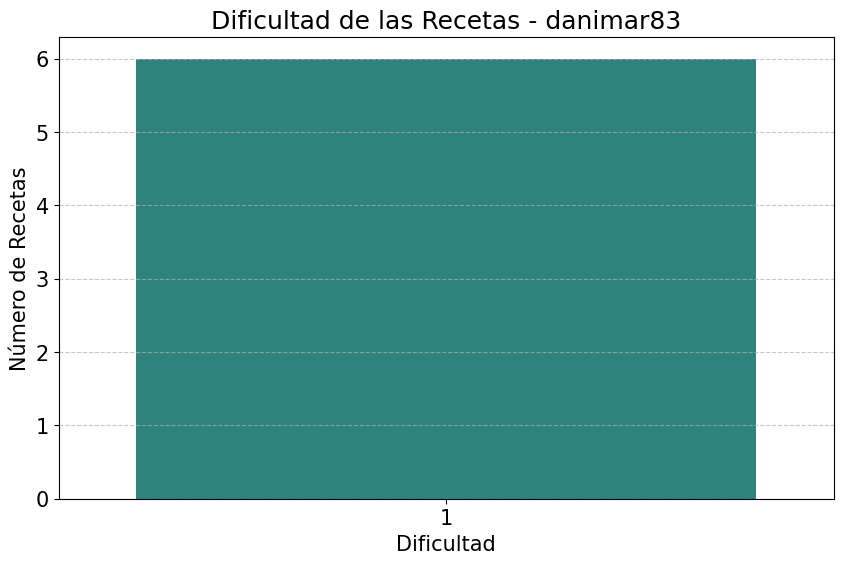

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

def recetas_por_autor(autor):
    
    
    # Filtrar el DataFrame por el nombre del autor ingresado (ignorando mayúsculas y minúsculas)
    df_autor = df_total[df_total['user.displayName'].str.lower().str.contains(autor)]
    
    # Verificar si el autor tiene recetas publicadas
    if df_autor.empty:
        print(f"No se encontraron recetas para el autor: {autor}")
        return
    
    # Información del autor
    info_usuario = df_autor[['user.displayName', 'user.instagram']].drop_duplicates()
    print("\nInformación del Autor:")
    print(info_usuario.to_string(index=False))
    
    # Número de recetas por categoría
    recetas_por_categoria = df_autor.groupby("categoryNiceName")["_id"].count().sort_values(ascending=False)
    print(f"\nNúmero de recetas por categoría para {autor}:\n{recetas_por_categoria}")

    # Gráfica de recetas por categoría
    recetas_por_categoria_df = recetas_por_categoria.reset_index()
    recetas_por_categoria_df.columns = ['categoryNiceName', 'num_recetas']
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x='num_recetas', 
        y='categoryNiceName', 
        data=recetas_por_categoria_df, 
        palette='viridis'
    )
    plt.title(f'Recetas por Categoría - {autor}')
    plt.xlabel('Número de Recetas')
    plt.ylabel('Categoría')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
    
    # Evaluaciones (ratings) del autor
    if 'rate' in df_autor.columns:
        evaluaciones = df_autor['rate'].value_counts()
        if not evaluaciones.empty:
            print("\nEvaluaciones de las recetas:")
            print(evaluaciones)
            plt.figure(figsize=(10, 6))
            sns.barplot(x=evaluaciones.index, y=evaluaciones.values, palette='viridis')
            plt.title(f'Evaluaciones de Recetas - {autor}')
            plt.xlabel('Evaluación')
            plt.ylabel('Número de Recetas')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()
    
    # Duración de las recetas (cookTime)
    if 'cookTime' in df_autor.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_autor['cookTime'].dropna() / 60, bins=10, color='cornflowerblue')
        plt.title(f'Duración de las Recetas - {autor}')
        plt.xlabel('Tiempo de Cocinado (minutos)')
        plt.ylabel('Número de Recetas')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    # Dificultad de las recetas
    if 'difficulty' in df_autor.columns:
        dificultad = df_autor['difficulty'].value_counts().sort_index()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=dificultad.index, y=dificultad.values, palette='viridis')
        plt.title(f'Dificultad de las Recetas - {autor}')
        plt.xlabel('Dificultad')
        plt.ylabel('Número de Recetas')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Solicitar el nombre del autor
autor = input("Introduce el nombre del autor: ")
recetas_por_autor(autor)

# Buscador de recetas

### busca palabras clave dentro de las recetas
### muestra lista de recetas que contienen palbra clave
### seleccionar o nombre correcto de la receta o numero de la misma
### te da info de toda la receta

In [ ]:
import re

# Lista de palabras comunes (preposiciones y determinantes) que queremos excluir de la búsqueda
palabras_excluidas = [
    "el", "la", "los", "las", "un", "una", "unos", "unas", "de", "del", "al",
    "por", "para", "con", "sin", "sobre", "entre", "y", "o", "u", "a", "en"
]

def limpiar_titulo(titulo):
    # Eliminar signos de puntuación y pasar a minúsculas
    titulo_limpio = re.sub(r'[^\w\s]', '', titulo.lower())
    # Excluir palabras comunes
    palabras = titulo_limpio.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in palabras_excluidas]
    return " ".join(palabras_filtradas)

def buscar_receta(titulo):
    # Limpiar el título ingresado
    titulo_limpio = limpiar_titulo(titulo)
    # Buscar coincidencias parciales en el DataFrame
    coincidencias = df_total[df_total['title'].str.lower().apply(limpiar_titulo).str.contains(titulo_limpio)]

    # Si encuentra coincidencias exactas
    if not coincidencias.empty:
        return coincidencias
    else:
        # Si no hay coincidencias exactas, buscar sugerencias similares
        sugerencias = df_total['title'][df_total['title'].str.lower().apply(limpiar_titulo).str.contains('|'.join(titulo_limpio.split()))].unique()
        if len(sugerencias) > 0:
            print("\nNo se encontró una coincidencia exacta. Quizás quisiste decir:")
            for i, sugerencia in enumerate(sugerencias, start=1):
                print(f"{i}. {sugerencia}")
            print("")

            # Preguntar al usuario si quiere elegir alguna sugerencia
            while True:
                opcion = input("Escribe el número de la receta o pulsa Enter para intentar de nuevo: ")
                if opcion.isdigit() and 1 <= int(opcion) <= len(sugerencias):
                    return df_total[df_total['title'] == sugerencias[int(opcion) - 1]]
                else:
                    titulo = input("Introduce de nuevo el nombre de la receta (Title): ").strip()
                    return buscar_receta(titulo)
        else:
            print("\nNo se encontró ninguna receta similar.")
            return pd.DataFrame()

def info_receta_por_titulo():
    titulo = input("Introduce el nombre de la receta (Title): ").strip()
    receta = buscar_receta(titulo)

    # Verificar si se encontró la receta
    if receta.empty:
        print("\nNo se encontró ninguna receta.")
        return

    # Extraer la información solicitada
    categoria = receta["categoryNiceName"].values[0]
    autor = receta["user.displayName"].values[0]
    dificultad = receta["difficulty"].values[0]
    tiempo_cocinado = receta["totalTime"].values[0] / 60  # Convertir a minutos
    advice = receta["advice"].values[0]
    precio = receta["price"].values[0]

    # Mostrar la información general de la receta
    print(f"\nInformación de la receta '{receta['title'].values[0]}':")
    print(f"Categoría: {categoria}")
    print(f"Autor: {autor}")
    print(f"Dificultad: {dificultad}")
    print(f"Tiempo de cocinado: {round(tiempo_cocinado, 2)} minutos")

    if advice != "No disponible":
        print(f"Consejo: {advice}")

    print(f"Precio: {precio}")

    # Filtrar y mostrar valores nutricionales redondeados
    print("\nValores nutricionales:")
    cols_nutricionales = [col for col in receta.columns if col.startswith("nutritional.") and col.endswith(".value")]
    for col in cols_nutricionales:
        # Limpiar el nombre de la columna
        nombre_nutriente = col.replace("nutritional.", "").replace(".value", "")
        valor = receta[col].values[0]
        if pd.notna(valor):  # Verifica que no sea NaN
            valor = round(float(valor), 1)  # Redondear a 1 decimal
            print(f" - {nombre_nutriente}: {valor}")

# Llamar a la función
info_receta_por_titulo()



No se encontró una coincidencia exacta. Quizás quisiste decir:
1. Bizcocho de mandarina: ¡esponjoso, jugoso y delicioso!
2. Bizcocho esponjoso de manzana
3. Bizcocho de mandarina
4. Bizcocho de Colacao súper esponjoso
5. Mi Bizcocho de Limón
6. Bizcocho de calabaza y almendra
7. Bizcocho de chocolate
8. Bizcocho de yogur
9. Bizcocho de manzana casero
10. Bizcocho XXL
11. Bizcocho para amantes del chocolate negro
12. Bizcocho de chocolate Mona de Pasqua
13. Bizcocho de calabaza tradicional
14. Bizcocho de zanahorias de la abuela
15. Bizcocho o "queque" de toda la vida🍋
16. Bizcocho de dulce de leche
17. Bizcocho con pepitas de chocolate
18. Bizcocho de naranja
19. Bizcocho integral de espelta con naranja, chocolate y nueces
20. Bizcocho de te matcha
21. Bizcocho de cacahuete, anacardos y chocolate
22. Bizcocho con trigo sarraceno
23. Bizcocho de coco
24. Bizcocho de chocolate con yogur griego
25. Bizcocho riquísimo
26. Clásico bizcocho de yogur con pepitas de chocolate. super esponjoso

# Mejoras
### Group_name: podrian organizarse como Entrante, Primer plato, Segundo plato, Postre y asi seria mas facil hacer menus

In [134]:
df_receta

,title,niceName,category,totalTime,difficulty,price,ingredients,steps,tags,group_steps,course
0,Salsa mozárabe de Belén,salsa-mozarabe-de-belen,Salsas y guarniciones,18.000000,2,2,"Aceite Oliva (35 ml), Cebolla (150 gr), Pasas ...",6,NaN,"Calentar el aceite, Añadir Cebolla, pasas y or...",entrante
1,Lentejas con arroz al aroma de Jerez (TM5 v2),lentejas-con-arroz-al-aroma-de-jerez--tm5-v2,Potajes y legumbres,0.050000,1,1,"Zanahoria (120 gr), Puerro (100 gr), Ajo (2 cl...",6,NaN,¡ATENCIÓN! LA PLATAFORMA ME OBLIGA A PUBLICAR ...,primer plato
2,Lentejas con arroz al aroma de Jerez (TM5),lentejas-con-arroz-al-aroma-de-jerez,Potajes y legumbres,0.050000,1,1,"Zanahoria (120 gr), Puerro (100 gr), Ajo (2 cl...",5,NaN,¡ATENCIÓN! LA PLATAFORMA ME OBLIGA A PUBLICAR ...,primer plato
3,Arroz Rojo Integral con Gambas y Calamar al Aj...,arroz-rojo-integral-con-gambas-y-calamar-al-aj...,Arroces,43.500000,1,1,"Ajo (3 clv), Aceite Oliva (60 gr), Guindilla (...",6,Gastronomía/Asiática,Mete los ajos en la jarra junto con el aceite ...,segundo plato
4,Galletas sin azúcar (Snacks),galletas-sin-azucar--snacks,Dulces y repostería,3.000000,1,1,"Plátano (2 u), Avena en copos (80 gr), Cacao (...",2,"Dietas/Baja en calorías, Gastronomía/Mediterránea","Añadimos todos los ingredientes a la jarra, Qu...",postre
...,...,...,...,...,...,...,...,...,...,...,...
9947,Puré de verduras Álex Efe,pure-de-verduras-alex-efe,Verduras y hortalizas,31.000000,0,0,"Aceite de oliva (50 gr), Cebolla (100 gr), Pue...",4,NaN,"Calienta el aceite 1 minuto, 120º, velocidad 1...",primer plato
9948,Pisto Álex Efe,pisto-alex-efe,Verduras y hortalizas,31.000000,0,0,"Aceite de oliva extra (100 gr), Ajo (4 clv), C...",6,NaN,"Calienta el aceite 2 minutos, 120º, velocidad ...",primer plato
9949,Galletas de limón mcp,galletas-de-limon-mcp,Dulces y repostería,45.333333,1,1,"Mantequilla (100 gr), Azúcar (150 gr), Sal (1 ...",6,NaN,Ponemos en la jarra la mantequilla a temperatu...,postre
9950,Natillas de chocolate mcp,natillas-de-chocolate-mcp,Dulces y repostería,7.083333,1,1,"Leche (600 gr), Azúcar (30 gr), Maizena (20 gr...",2,NaN,Incorporamos los ingredientes y mezclamos todo...,postre


In [135]:
df_total

,_id,title,niceName,category,categoryNiceName,totalTime,cookTime,difficulty,price,advice,...,nutritional.Cholestrl.unit,seo.follow,compatibility.S1,imageRights,rate,social.todo,nutritionalForRation,status.nutritional,nutritionalExtra.kcal.color,nutritionalExtra.kcal.percent
0,67aa4802c995db82d9be53da,Relleno para tarta de atún,relleno-para-tarta-de-atun,Pescados y mariscos,pescados-y-mariscos,630,630.0,1,2,No disponible,...,mg,True,relleno-para-tarta-de-atun,False,No disponible,1.0,False,Auto (Bad),Yellow,22.656050
1,679cdc1d0f62ba1b8efdc7fb,"Bizcocho de mandarina: ¡esponjoso, jugoso y de...",bizcocho-de-mandarina---esponjoso--jugoso-y-de...,Dulces y repostería,dulces-y-reposteria,6840,250.0,1,1,1.\tUtiliza mandarinas frescas. El sabor cítri...,...,mg,True,bizcocho-de-mandarina---esponjoso--jugoso-y-de...,True,No disponible,1.0,False,Auto (Good),Yellow,17.605821
2,6795e359087b7ea1a54c5aa2,Estofado de carne de cerdo low carb,estofado-de-carne-de-cerdo-low-carb,Carnes y aves,carnes-y-aves,60,60.0,1,1,No disponible,...,mg,True,estofado-de-carne-de-cerdo-low-carb,True,0.0,0.0,False,Auto (Bad),Yellow,19.292895
3,6795f7ee087b7ea1a55a43cd,Salsa sueca para albóndigas,salsa-sueca-para-albondigas,Salsas y guarniciones,salsas-y-guarniciones,480,480.0,1,1,No disponible,...,mg,True,salsa-sueca-para-albondigas,True,No disponible,1.0,False,Auto (Bad),Green,7.390834
4,67952fee087b7ea1a5e1147f,Bizcocho esponjoso de manzana,bizcocho-esponjoso-de-manzana,Dulces y repostería,dulces-y-reposteria,2703,420.0,1,1,No disponible,...,mg,True,bizcocho-esponjoso-de-manzana,True,0.0,6.0,False,Auto (Good),Green,12.356235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8433,5e8899c1dcfe9b38b4bb6ba0,Arroz meloso con verdura,arroz-meloso-con-verdura,Arroces,arroces,1380,1380.0,1,1,Deja reposar al menos 5 minutos antes de servir,...,mg,True,arroz-meloso-con-verdura,True,4.909090909090909,200.0,False,Auto (Good),Green,14.392933
8434,5e886ff59e141d0060be359d,Puré de verduras Álex Efe,pure-de-verduras-alex-efe,Verduras y hortalizas,verduras-y-hortalizas,1860,1860.0,0,0,No disponible,...,mg,True,pure-de-verduras-alex-efe,False,No disponible,1.0,False,Auto (Good),Green,9.249375
8435,5e878a896995123f81d6ab5f,Galletas de limón mcp,galletas-de-limon-mcp,Dulces y repostería,dulces-y-reposteria,2720,80.0,1,1,No disponible,...,mg,True,galletas-de-limon-mcp,True,5.0,32.0,False,Auto (Good),Green,7.324822
8436,5e878415c7a71c3219694a64,Natillas de chocolate mcp,natillas-de-chocolate-mcp,Dulces y repostería,dulces-y-reposteria,425,420.0,1,1,No disponible,...,mg,True,natillas-de-chocolate-mcp,True,4.111111111111111,73.0,False,Auto (Good),Green,9.484875


# Menu diario


Estrategia:
Se asignarán porcentajes de calorías a cada comida:
Desayuno: 20%
Almuerzo: 55% (15% entrante, 25% primer plato, 25% segundo plato, 10% postre, 5% bebida)
Cena: 25% (20% segundo plato, 5% postre)
Se verificará que no se exceda el límite en ninguna sección antes de añadirla al menú.

In [141]:
import random

def seleccionar_receta(curso, limite_calorias_min, limite_calorias_max):
    """
    Selecciona una receta aleatoria de un curso específico con calorías dentro del rango
    entre limite_calorias_min y limite_calorias_max.
    """
    # Filtrar recetas del curso y que tengan kcal dentro del rango permitido
    recetas = df_receta[df_receta['course'] == curso]
    recetas = recetas[recetas['niceName'].isin(df_total[df_total['nutritionalExtra.kcal.percent'].astype(float) > 0]['niceName'])]
    
    # Filtrar por rango de calorías
    recetas_filtradas = recetas[recetas['niceName'].apply(
        lambda x: limite_calorias_min <= df_total[df_total['niceName'] == x]['nutritionalExtra.kcal.percent'].sum() <= limite_calorias_max)]
    
    if not recetas_filtradas.empty:
        receta = recetas_filtradas.sample().iloc[0]
        nice_name = receta['niceName']
        calorias = df_total[(df_total['niceName'] == nice_name)]['nutritionalExtra.kcal.percent'].astype(float).sum()
        return receta['title'], calorias
    return "No disponible", 0

def crear_menu_semanal():
    """
    Crea un menú semanal equilibrado en calorías:
      - Desayuno: 20%
      - Almuerzo: 55% (15% entrante, 25% primer plato, 25% segundo plato, 10% postre, 5% bebida)
      - Cena: 25% (20% segundo plato, 5% postre)
    """
    menu = {
        'desayuno': seleccionar_receta('postre', 15, 25),
        'almuerzo': {
            'entrante': seleccionar_receta('entrante', 10, 20),
            'primer plato': seleccionar_receta('primer plato', 20, 30),
            'segundo plato': seleccionar_receta('segundo plato', 20, 30),
            'postre': seleccionar_receta('postre', 5, 15),
            'bebida': seleccionar_receta('bebida', 3, 10)
        },
        'cena': {
            'segundo plato': seleccionar_receta('segundo plato', 15, 25),
            'postre': seleccionar_receta('postre', 5, 10)
        }
    }
    
    return menu

def calcular_total_calorias(menu):
    """
    Calcula el total de calorías de un menú dado.
    """
    total_calorias = 0
    for comida, platos in menu.items():
        if isinstance(platos, dict):
            for plato, detalle in platos.items():
                nombre, calorias = detalle
                total_calorias += calorias
        else:
            nombre, calorias = platos
            total_calorias += calorias
    return total_calorias

def ajustar_menu(menu, limite_min, limite_max):
    """
    Ajusta el menú para que la suma total de calorías esté entre limite_min y limite_max.
    """
    total_calorias = calcular_total_calorias(menu)
    
    while total_calorias < limite_min or total_calorias > limite_max:
        menu = crear_menu_semanal()
        total_calorias = calcular_total_calorias(menu)
    
    return menu, total_calorias

# Generar el menú semanal
menu_semanal = crear_menu_semanal()

# Ajustar el menú hasta que el total de calorías esté entre 93% y 107%
menu_semanal_ajustado, total_calorias = ajustar_menu(menu_semanal, 93, 107)

# Imprimir el menú ajustado
print("Menú semanal equilibrado:")
for comida, platos in menu_semanal_ajustado.items():
    if isinstance(platos, dict):
        print(f"\n{comida.capitalize()}:")
        for plato, detalle in platos.items():
            nombre, calorias = detalle
            print(f"  {plato.capitalize()}: {nombre} ({calorias:.2f} % kcal)")
    else:
        nombre, calorias = platos
        print(f"\n{comida.capitalize()}: {nombre} ({calorias:.2f} % kcal)")

print(f"\nTotal de calorías: {total_calorias:.2f} % (Equilibrado)")


Menú semanal equilibrado:

Desayuno: Puré lentejas Nika (15.61 % kcal)

Almuerzo:
  Entrante: Canapés de salmón ahumado (11.00 % kcal)
  Primer plato: Guisantes con beicon y huevo (24.08 % kcal)
  Segundo plato: Pechuga rellena,  de espinaca y queso. (21.22 % kcal)
  Postre: Puré de pavo y verduras (5.74 % kcal)
  Bebida: Agua fresca de sandía (3.84 % kcal)

Cena:
  Segundo plato: Pollo con almendras (estilo Lola) (19.24 % kcal)
  Postre: Peras en almíbar (5.98 % kcal)

Total de calorías: 106.72 % (Equilibrado)
